In [409]:
import pandas as pd
import numpy as np
import os
import json
import math
import itertools as it
from sklearn.cluster import KMeans
from sklearn import decomposition
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [411]:
path = '/Users/Mac/Downloads/Malware/TrendMicro-malware-dataset/'
new_list = []
feats=[]
lbs=[]




for i in os.listdir(path):
    if i == '.DS_Store':
        continue
    if 'info' in os.listdir(path +i):
        with open (path + i+'/info') as f:
            dataa = json.load(f)
            dataa['sha1']=i
            new_list.append(dataa)
            

In [412]:
pddict = {}
for i in new_list:
    for k in i.keys():
        k = k.encode('ascii','ignore')
        if k not in pddict:
            pddict[k] = []

In [413]:
for i in new_list:
    for k in i.keys():
        k = k.encode('ascii','ignore')
        if k in pddict:
            pddict[k].append(i[k])
df = pd.DataFrame.from_dict(pddict,orient='index').T

,DllCharacteristics,TimeDateStamp,BaseOfCode,FileDescription,FileEntropy,ImageVersion,LoaderFlags,SizeOfStackCommit,SizeOfUninitializedData,SizeOfHeapReserve,...,sha1,CompanyName,ImageBase,SizeOfInitializedData,NumberOfSymbols,ProductName,SizeOfImage,NumberOfRvaAndSizes,FileSize,Characteristics
0,0x8140,1437144778,0x1000,Remote Service Application,7.68052,16.0,0x0,4096,0,1048576,...,00034ba766f8721f43999bbfa341969fac85fdfe,,0x400000,491520,0,Remote Service Application,684032,16,642768,0x102
1,0x0,2099200,0x1000,Remote Service Application,7.87682,0.0,0x0,4096,65536,1048576,...,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0x400000,43008,0,Remote Service Application,155648,16,63488,0x10f
2,0x0,1334513212,0x1000,Microsoft® Forms DLL,6.23176,0.0,0x0,16384,0,1048576,...,00141e38f00072e8854a8aeec7028456e54eb341,,0x400000,86016,0,Microsoft® Forms,745472,16,745473,0x818e
3,0x8140,1434638403,0x1000,Remote Service Application,7.58456,16.0,0x0,4096,0,1048576,...,0019d715f0f3ab076ba01946ab33b510d697a204,,0x400000,558592,0,Remote Service Application,749568,16,710864,0x102
4,0x8140,1434638134,0x1000,MDM Device Interface for Rio 800 device.,7.71758,16.0,0x0,4096,0,1048576,...,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0x400000,534016,0,Diamond Rio800,745472,16,686296,0x102
5,0x0,1339084793,0x1000,Remote Service Application,6.61789,0.0,0x0,16384,0,1048576,...,001c5920be0447c52c77b5673121f91167dae3e0,,0x400000,86528,0,Remote Service Application,729088,16,674304,0x818e
6,0x8040,1328307148,0x1000,Remote Service Application,6.39373,5.1,0x0,4096,0,1048576,...,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,0x400000,185856,0,Remote Service Application,479232,16,463560,0x102
7,0x0,969768308,0x1000,Remote Service Application,7.75624,0.0,0x0,4096,0,1048576,...,0025b66c923168bf934d6ea74f64cd68511cfc18,,0x400000,128000,0,Remote Service Application,372736,16,196589,0x10f
8,0x8140,1434696550,0x1000,WriteDogLimitTime Microsoft 基础类应用程序,7.66242,16.0,0x0,4096,0,1048576,...,002f2ea80a675231c4392c5b338a9710d4463b7b,,0x400000,547840,0,WriteDogLimitTime 应用程序,733184,16,700112,0x102
9,0x8040,1375877276,0x1000,TODO: <파일 설명>,6.38446,5.1,0x0,4096,0,1048576,...,003dce457da9125e95f71d6df3b7224183228ce6,,0x400000,185856,0,TODO: <제품 이름>,479232,16,461312,0x102


In [415]:
df.describe(include=['O']).iloc[:,:18]

,DllCharacteristics,TimeDateStamp,BaseOfCode,FileDescription,FileEntropy,ImageVersion,LoaderFlags,SizeOfStackCommit,SizeOfUninitializedData,SizeOfHeapReserve,LinkerVersion,SizeOfHeapCommit,SizeOfStackReserve,OperatingSystemVersion,SizeOfHeaders,Subsystem,FileVersion,LegalCopyright
count,17952,17952,17952,5672,17952.000000,17952,17952,17952,17952,17952,17952,17952,17952,17952,17952,17952,8204,5633
unique,22,8483,205,1454,17952.000000,30,5,17,214,12,53,9,26,14,11,4,2958,951
top,0x0,1339084793,0x1000,Remote Service Application,7.886978,0.0,0x0,4096,0,1048576,11.0,4096,1048576,4.0,1024,0x2,"1, 0, 0, 1",Copyright (C) 1999
freq,8923,1946,16929,2331,1.000000,12396,17929,14987,14468,17808,3840,17932,14869,8821,14499,17375,2733,2358


In [416]:
df.describe(include=['O']).iloc[:,18:]

,NumberOfSections,FileAlignment,ProductVersion,SubsystemVersion,BaseOfData,SizeOfOptionalHeader,AddressOfEntryPoint,SectionAlignment,SizeOfCode,sha1,CompanyName,ImageBase,SizeOfInitializedData,NumberOfSymbols,ProductName,SizeOfImage,NumberOfRvaAndSizes,FileSize,Characteristics
count,17952,17952,8138,17952,17950,17952,17952,17952,17952,17952,7861,17952,17952,17952,5614,17952,17952,17952,17952
unique,18,4,2832,13,441,7,4221,4,919,17952,775,22,1328,16,1256,921,6,5813,35
top,5,0x200,"4, 0, 0, 0",4.0,0x5000,224,0x8f888,0x1000,13824,124b6bfffc342ec9f850d51d3363918e4e44f569,Microsoft Corp.,0x400000,43008,0,Remote Service Application,147456,16,63488,0x102
freq,7733,15562,2336,9252,1963,17934,1573,17877,1870,1,2332,17172,1844,17935,2330,1287,17943,1090,8189


In [417]:
dfdes = df.describe(include=['O'])

In [418]:
dfdes.loc['freq',:] < 10000

DllCharacteristics          True
TimeDateStamp               True
BaseOfCode                 False
FileDescription             True
FileEntropy                 True
ImageVersion               False
LoaderFlags                False
SizeOfStackCommit          False
SizeOfUninitializedData    False
SizeOfHeapReserve          False
LinkerVersion               True
SizeOfHeapCommit           False
SizeOfStackReserve         False
OperatingSystemVersion      True
SizeOfHeaders              False
Subsystem                  False
FileVersion                 True
LegalCopyright              True
NumberOfSections            True
FileAlignment              False
ProductVersion              True
SubsystemVersion            True
BaseOfData                  True
SizeOfOptionalHeader       False
AddressOfEntryPoint         True
SectionAlignment           False
SizeOfCode                  True
sha1                        True
CompanyName                 True
ImageBase                  False
SizeOfInit

In [419]:
dfdes1 = dfdes.loc[:,dfdes.loc['freq',:] < 10000]

In [420]:
dfiuse = df.loc[:,dfdes1.columns]

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
0,0x8140,1437144778,Remote Service Application,7.68052,12.0,5.1,"1, 0, 0, 1",Copyright (C) 1999,5,"4, 0, 0, 0",...,0x24000,0x11534,143360,00034ba766f8721f43999bbfa341969fac85fdfe,,491520,Remote Service Application,684032,642768,0x102
1,0x0,2099200,Remote Service Application,7.87682,5.12,4.0,"1, 0, 0, 1",Copyright (C) 1999,3,"4, 0, 0, 0",...,0x5000,0x1a2b,13824,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,43008,Remote Service Application,155648,63488,0x10f
2,0x0,1334513212,Microsoft® Forms DLL,6.23176,2.25,4.0,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,9,1.00.4211.0,...,0x92000,0x90888,588800,00141e38f00072e8854a8aeec7028456e54eb341,,86016,Microsoft® Forms,745472,745473,0x818e
3,0x8140,1434638403,Remote Service Application,7.58456,12.0,5.1,"1, 0, 0, 1",Copyright (C) 1999,6,"4, 0, 0, 0",...,0x25000,0x118b4,144384,0019d715f0f3ab076ba01946ab33b510d697a204,,558592,Remote Service Application,749568,710864,0x102
4,0x8140,1434638134,MDM Device Interface for Rio 800 device.,7.71758,12.0,5.1,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,5,1.0.5701.28223,...,0x25000,0x118b4,144384,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,534016,Diamond Rio800,745472,686296,0x102
5,0x0,1339084793,Remote Service Application,6.61789,2.25,4.0,1.0.5702.17415,Copyright (C) 1999,9,1.0.5702.17415,...,0x91000,0x8f888,586752,001c5920be0447c52c77b5673121f91167dae3e0,,86528,Remote Service Application,729088,674304,0x818e
6,0x8040,1328307148,Remote Service Application,6.39373,11.0,5.1,1.0.5705.8414,Copyright (C) 1999,5,1.0.5705.8414,...,0x47000,0x40a3b,285696,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,185856,Remote Service Application,479232,463560,0x102
7,0x0,969768308,Remote Service Application,7.75624,7.10,4.0,1.0.2.1,Copyright (C) 1999,6,1.0.2.1,...,0x9000,0x42000,29696,0025b66c923168bf934d6ea74f64cd68511cfc18,,128000,Remote Service Application,372736,196589,0x10f
8,0x8140,1434696550,WriteDogLimitTime Microsoft 基础类应用程序,7.66242,12.0,5.1,1.0.5702.3001,版权所有 (C) 2007,6,1.0.5702.3001,...,0x25000,0x118b4,144384,002f2ea80a675231c4392c5b338a9710d4463b7b,,547840,WriteDogLimitTime 应用程序,733184,700112,0x102
9,0x8040,1375877276,TODO: <파일 설명>,6.38446,11.0,5.1,"1, 0, 0, 1",TODO: (c) <회사 이름>. All rights reserved.,5,"4, 0, 0, 0",...,0x47000,0x40b9b,285696,003dce457da9125e95f71d6df3b7224183228ce6,,185856,TODO: <제품 이름>,479232,461312,0x102


In [421]:
dfiuse.describe(include = ['O']).iloc[:,:10]

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion
count,17952,17952,5672,17952.000000,17952,17952,8204,5633,17952,8138
unique,22,8483,1454,17952.000000,53,14,2958,951,18,2832
top,0x0,1339084793,Remote Service Application,7.886978,11.0,4.0,"1, 0, 0, 1",Copyright (C) 1999,5,"4, 0, 0, 0"
freq,8923,1946,2331,1.000000,3840,8821,2733,2358,7733,2336


In [422]:
dfiuse.describe(include = ['O']).iloc[:,10:]

,SubsystemVersion,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
count,17952,17950,17952,17952,17952,7861,17952,5614,17952,17952,17952
unique,13,441,4221,919,17952,775,1328,1256,921,5813,35
top,4.0,0x5000,0x8f888,13824,124b6bfffc342ec9f850d51d3363918e4e44f569,Microsoft Corp.,43008,Remote Service Application,147456,63488,0x102
freq,9252,1963,1573,1870,1,2332,1844,2330,1287,1090,8189


# Turn objects to floats (for versions and continuous value)

In [423]:
floatcol = ['TimeDateStamp','FileEntropy','LinkerVersion','OperatingSystemVersion','NumberOfSections','SubsystemVersion'\
           ,'SizeOfInitializedData','SizeOfImage','FileSize','SizeOfCode']
for i in floatcol:
    dfiuse[i] = dfiuse[i].astype('float')

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics
0,0x8140,1.437145e+09,Remote Service Application,7.680524,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,5.0,"4, 0, 0, 0",...,0x24000,0x11534,143360.0,00034ba766f8721f43999bbfa341969fac85fdfe,,491520.0,Remote Service Application,684032.0,642768.0,0x102
1,0x0,2.099200e+06,Remote Service Application,7.876825,5.12,4.0,"1, 0, 0, 1",Copyright (C) 1999,3.0,"4, 0, 0, 0",...,0x5000,0x1a2b,13824.0,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,43008.0,Remote Service Application,155648.0,63488.0,0x10f
2,0x0,1.334513e+09,Microsoft® Forms DLL,6.231758,2.25,4.0,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,9.0,1.00.4211.0,...,0x92000,0x90888,588800.0,00141e38f00072e8854a8aeec7028456e54eb341,,86016.0,Microsoft® Forms,745472.0,745473.0,0x818e
3,0x8140,1.434638e+09,Remote Service Application,7.584560,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,6.0,"4, 0, 0, 0",...,0x25000,0x118b4,144384.0,0019d715f0f3ab076ba01946ab33b510d697a204,,558592.0,Remote Service Application,749568.0,710864.0,0x102
4,0x8140,1.434638e+09,MDM Device Interface for Rio 800 device.,7.717577,12.00,5.1,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,5.0,1.0.5701.28223,...,0x25000,0x118b4,144384.0,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,534016.0,Diamond Rio800,745472.0,686296.0,0x102
5,0x0,1.339085e+09,Remote Service Application,6.617888,2.25,4.0,1.0.5702.17415,Copyright (C) 1999,9.0,1.0.5702.17415,...,0x91000,0x8f888,586752.0,001c5920be0447c52c77b5673121f91167dae3e0,,86528.0,Remote Service Application,729088.0,674304.0,0x818e
6,0x8040,1.328307e+09,Remote Service Application,6.393731,11.00,5.1,1.0.5705.8414,Copyright (C) 1999,5.0,1.0.5705.8414,...,0x47000,0x40a3b,285696.0,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,185856.0,Remote Service Application,479232.0,463560.0,0x102
7,0x0,9.697683e+08,Remote Service Application,7.756242,7.10,4.0,1.0.2.1,Copyright (C) 1999,6.0,1.0.2.1,...,0x9000,0x42000,29696.0,0025b66c923168bf934d6ea74f64cd68511cfc18,,128000.0,Remote Service Application,372736.0,196589.0,0x10f
8,0x8140,1.434697e+09,WriteDogLimitTime Microsoft 基础类应用程序,7.662417,12.00,5.1,1.0.5702.3001,版权所有 (C) 2007,6.0,1.0.5702.3001,...,0x25000,0x118b4,144384.0,002f2ea80a675231c4392c5b338a9710d4463b7b,,547840.0,WriteDogLimitTime 应用程序,733184.0,700112.0,0x102
9,0x8040,1.375877e+09,TODO: <파일 설명>,6.384455,11.00,5.1,"1, 0, 0, 1",TODO: (c) <회사 이름>. All rights reserved.,5.0,"4, 0, 0, 0",...,0x47000,0x40b9b,285696.0,003dce457da9125e95f71d6df3b7224183228ce6,,185856.0,TODO: <제품 이름>,479232.0,461312.0,0x102


# Normalization

In [424]:
cols_to_norm = ['TimeDateStamp','FileEntropy','NumberOfSections','SubsystemVersion'\
           ,'SizeOfInitializedData','SizeOfImage','FileSize','SizeOfCode']
dfiuse[cols_to_norm] = dfiuse[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# DllCharacteristics

In [426]:
df.DllCharacteristics.value_counts()

0x0       8923
0x8140    5566
0x8040    2540
0x8000     609
0x8800     172
0x8100      34
0x8540      29
0x8400      20
0x400       20
0x8440      14
0x8500       6
0x140        4
0x8300       3
0x100        2
0x35         2
0x1          2
0x40         1
0x8012       1
0x8200       1
0xc140       1
0x540        1
0x1100       1
Name: DllCharacteristics, dtype: int64

In [427]:
dfiuse['Dlldummies'] = dfiuse.DllCharacteristics.str[2]
dfiuse['Dlldummies'] = dfiuse['Dlldummies'].map({'8':1}).astype('float')
dfiuse.loc[dfiuse['Dlldummies']!= 1,'Dlldummies'] = 0

# FileDescription 

In [432]:
df.FileDescription.value_counts()

Remote Service Application                               2331
copymar                                                   157
                                                           68
globalUpdate Update                                        61
MDM Device Interface for Rio 800 device.                   48
360安全桌面 WEBAPP                                             46
Microsoft (r) VBScript                                     45
Internet Ratings and Local User Management DLL             40
nfapinet2                                                  33
Age of Empires                                             30
Microsoft® HTML Editing Component's Resource DLL           27
易语言程序                                                      26
NewServe 应用程序                                              25
Age of Empires, the Rise of Rome                           25
Wired AutoConfig Service                                   22
Shell Doc Object and Control Library                       21
Windows 

# FileEntropy

In [433]:
max(df.FileEntropy)

7.9993660639518405

[5, 16, 0, 2]

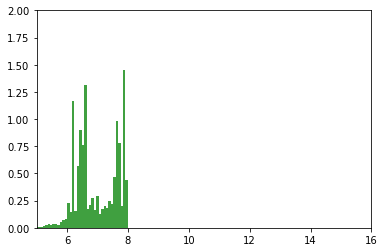

In [434]:
n, bins, patches = plt.hist(df.FileEntropy, 100, normed=1, facecolor='green', alpha=0.75)
plt.axis([5,16, 0,2])

# LinkerVersion

In [435]:
df.LinkerVersion.value_counts()

11.0      3840
12.0      3831
6.0       2758
2.25      2645
5.12      2474
9.0        596
8.0        522
7.10       262
10.0       235
6.20       172
0.0        137
5.0        102
7.0         93
4.20        46
1.0         45
8.12        37
5.10        24
6.4         23
2.50        22
4.1         12
3.0         10
2.56         8
4.0          6
7.4          5
3.10         4
2.52         3
0.1          3
10.10        3
5.2          3
2.24         2
3.189        2
1.71         2
9.2          2
7.1          2
2.0          2
83.82        2
5.3          1
6.1          1
2.60         1
12.10        1
2.30         1
154.2        1
76.111       1
2.111        1
8.1          1
12.11        1
6.15         1
25.17        1
0.50         1
1.50         1
4.21         1
6.27         1
7.80         1
Name: LinkerVersion, dtype: int64

In [436]:
dfiuse.head()

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics,Dlldummies
0,0x8140,0.374273,Remote Service Application,0.960093,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,0.20,"4, 0, 0, 0",...,0x11534,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,,0.000122,Remote Service Application,0.004538,0.021386,0x102,1.0
1,0x0,0.000547,Remote Service Application,0.984663,5.12,4.0,"1, 0, 0, 1",Copyright (C) 1999,0.10,"4, 0, 0, 0",...,0x1a2b,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0.000011,Remote Service Application,0.001033,0.001989,0x10f,0.0
2,0x0,0.347545,Microsoft® Forms DLL,0.778764,2.25,4.0,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,0.40,1.00.4211.0,...,0x90888,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,,0.000021,Microsoft® Forms,0.004945,0.024825,0x818e,0.0
3,0x8140,0.373621,Remote Service Application,0.948082,12.00,5.1,"1, 0, 0, 1",Copyright (C) 1999,0.25,"4, 0, 0, 0",...,0x118b4,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,,0.000138,Remote Service Application,0.004973,0.023666,0x102,1.0
4,0x8140,0.373621,MDM Device Interface for Rio 800 device.,0.964731,12.00,5.1,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,0.20,1.0.5701.28223,...,0x118b4,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0.000132,Diamond Rio800,0.004945,0.022843,0x102,1.0


In [438]:
dfiuse.loc[dfiuse['LinkerVersion']<= 6,'LinkerVersion'] = 0
dfiuse.loc[dfiuse['LinkerVersion']> 6,'LinkerVersion'] = 1

In [439]:
dfiuse.LinkerVersion.value_counts()

1.0    9635
0.0    8317
Name: LinkerVersion, dtype: int64

# OperatingSystemVersion (分兩好) 5以上 4以下

In [297]:
df.OperatingSystemVersion.value_counts()

4.0     8821
5.1     7932
5.0      868
6.0      129
0.0       99
5.2       40
1.0       32
6.1       19
6.3        5
4.1        2
6.2        2
4.14       1
8.0        1
10.0       1
Name: OperatingSystemVersion, dtype: int64

In [298]:
dfiuse.loc[dfiuse['OperatingSystemVersion']<  5 ,'OperatingSystemVersion'] = 0
dfiuse.loc[dfiuse['OperatingSystemVersion']>= 5 ,'OperatingSystemVersion'] = 1

In [299]:
dfiuse.OperatingSystemVersion.value_counts()

1.0    8997
0.0    8955
Name: OperatingSystemVersion, dtype: int64

# FileVersion (不佳)

In [300]:
df.FileVersion.value_counts()

1, 0, 0, 1                                                       2733
6.10.0016.1624                                                    172
1.0.0.0                                                           121
8.00.6001.18702 (longhorn_ie8_rtm(wmbla).090308-0339)              66
1.3.25.0                                                           61
1.0.0.1                                                            52
1.0.2.1                                                            48
1, 0, 1, 1096                                                      46
5.5.0.7426                                                         45
7.00.5730.13 (longhorn(wmbla).070711-1130)                         34
11.0.5721.5262 (WMP_11.090130-1421)                                33
00.09.13.0409                                                      30
10.0.10240.16384 (th1.150709-1700)                                 27
11.0.5721.5145 (WMP_11.061018-2006)                                26
00.04.2.0901        

# NumberOfSections （Normalized）

In [301]:
df.NumberOfSections.value_counts()

5     7733
3     3342
9     2085
6     1854
4     1663
7      800
8      226
2      102
10      76
11      34
17      11
13      10
12       8
1        4
19       1
14       1
15       1
21       1
Name: NumberOfSections, dtype: int64

# ProductVersion 

In [302]:
df.ProductVersion.value_counts()

4, 0, 0, 0                                                       2336
1, 0, 0, 1                                                        411
6.10.0016.1624                                                    172
1.0.0.0                                                           138
8.00.6001.18702                                                    66
1.3.25.0                                                           61
1.0.0.1                                                            51
1.0.2.1                                                            48
1, 0, 1, 1096                                                      46
5.5.0.7426                                                         45
11.0.5721.5262                                                     35
1.0                                                                35
7.00.5730.13                                                       34
1.0b                                                               30
10.0.10240.16384    

# SubSystemVersion

In [304]:
df.SubsystemVersion.value_counts()

4.0        9252
5.1        7971
5.0         679
6.0          26
6.1           6
4.65280       4
3.10          3
4.1           2
3.51          2
4.10          2
6.2           2
5.2           2
0.0           1
Name: SubsystemVersion, dtype: int64

In [305]:
dfiuse.loc[dfiuse['SubsystemVersion']< 5 ,'SubsystemVersion'] = 0
dfiuse.loc[dfiuse['SubsystemVersion']>= 5 ,'SubsystemVersion'] = 1

In [376]:
dfiuse.LinkerVersion.value_counts()

11.0      3840
12.0      3831
6.0       2758
2.25      2645
5.12      2474
9.0        596
8.0        522
7.10       262
10.0       235
6.20       172
0.0        137
5.0        102
7.0         93
4.20        46
1.0         45
8.12        37
5.10        24
6.4         23
2.50        22
4.1         12
3.0         10
2.56         8
4.0          6
7.4          5
3.10         4
2.52         3
0.1          3
10.10        3
5.2          3
2.24         2
3.189        2
1.71         2
9.2          2
7.1          2
2.0          2
83.82        2
5.3          1
6.1          1
2.60         1
12.10        1
2.30         1
154.2        1
76.111       1
2.111        1
8.1          1
12.11        1
6.15         1
25.17        1
0.50         1
1.50         1
4.21         1
6.27         1
7.80         1
Name: LinkerVersion, dtype: int64

In [306]:
dfiuse

,DllCharacteristics,TimeDateStamp,FileDescription,FileEntropy,LinkerVersion,OperatingSystemVersion,FileVersion,LegalCopyright,NumberOfSections,ProductVersion,...,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics,Dlldummies
0,0x8140,0.374273,Remote Service Application,0.960093,1.0,1.0,"1, 0, 0, 1",Copyright (C) 1999,0.20,"4, 0, 0, 0",...,0x11534,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,,0.000122,Remote Service Application,0.004538,0.021386,0x102,1.0
1,0x0,0.000547,Remote Service Application,0.984663,0.0,0.0,"1, 0, 0, 1",Copyright (C) 1999,0.10,"4, 0, 0, 0",...,0x1a2b,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0.000011,Remote Service Application,0.001033,0.001989,0x10f,0.0
2,0x0,0.347545,Microsoft® Forms DLL,0.778764,0.0,0.0,1.00.4211.0,Unpublished work. Copyright© Microsoft Corp. 1...,0.40,1.00.4211.0,...,0x90888,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,,0.000021,Microsoft® Forms,0.004945,0.024825,0x818e,0.0
3,0x8140,0.373621,Remote Service Application,0.948082,1.0,1.0,"1, 0, 0, 1",Copyright (C) 1999,0.25,"4, 0, 0, 0",...,0x118b4,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,,0.000138,Remote Service Application,0.004973,0.023666,0x102,1.0
4,0x8140,0.373621,MDM Device Interface for Rio 800 device.,0.964731,1.0,1.0,1.0.5701.28223,Copyright © 2000 - 2001 S3/Diamond Multimedia,0.20,1.0.5701.28223,...,0x118b4,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0.000132,Diamond Rio800,0.004945,0.022843,0x102,1.0
5,0x0,0.348736,Remote Service Application,0.827093,0.0,0.0,1.0.5702.17415,Copyright (C) 1999,0.40,1.0.5702.17415,...,0x8f888,0.000332,001c5920be0447c52c77b5673121f91167dae3e0,,0.000021,Remote Service Application,0.004837,0.022442,0x818e,0.0
6,0x8040,0.345929,Remote Service Application,0.799037,1.0,1.0,1.0.5705.8414,Copyright (C) 1999,0.20,1.0.5705.8414,...,0x40a3b,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,0.000046,Remote Service Application,0.003179,0.015385,0x102,1.0
7,0x0,0.252555,Remote Service Application,0.969570,1.0,0.0,1.0.2.1,Copyright (C) 1999,0.25,1.0.2.1,...,0x42000,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,,0.000032,Remote Service Application,0.002473,0.006446,0x10f,0.0
8,0x8140,0.373636,WriteDogLimitTime Microsoft 基础类应用程序,0.957827,1.0,1.0,1.0.5702.3001,版权所有 (C) 2007,0.25,1.0.5702.3001,...,0x118b4,0.000082,002f2ea80a675231c4392c5b338a9710d4463b7b,,0.000135,WriteDogLimitTime 应用程序,0.004864,0.023306,0x102,1.0
9,0x8040,0.358318,TODO: <파일 설명>,0.797876,1.0,1.0,"1, 0, 0, 1",TODO: (c) <회사 이름>. All rights reserved.,0.20,"4, 0, 0, 0",...,0x40b9b,0.000162,003dce457da9125e95f71d6df3b7224183228ce6,,0.000046,TODO: <제품 이름>,0.003179,0.015310,0x102,1.0


# Drop unused columns

In [307]:
dfiuse.iloc[:,10:]

,SubsystemVersion,BaseOfData,AddressOfEntryPoint,SizeOfCode,sha1,CompanyName,SizeOfInitializedData,ProductName,SizeOfImage,FileSize,Characteristics,Dlldummies
0,0.0,0x24000,0x11534,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,,0.000122,Remote Service Application,0.004538,0.021386,0x102,1.0
1,0.0,0x5000,0x1a2b,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,Microsoft Corp.,0.000011,Remote Service Application,0.001033,0.001989,0x10f,0.0
2,0.0,0x92000,0x90888,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,,0.000021,Microsoft® Forms,0.004945,0.024825,0x818e,0.0
3,0.0,0x25000,0x118b4,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,,0.000138,Remote Service Application,0.004973,0.023666,0x102,1.0
4,0.0,0x25000,0x118b4,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,Microsoft Corp.,0.000132,Diamond Rio800,0.004945,0.022843,0x102,1.0
5,0.0,0x91000,0x8f888,0.000332,001c5920be0447c52c77b5673121f91167dae3e0,,0.000021,Remote Service Application,0.004837,0.022442,0x818e,0.0
6,0.0,0x47000,0x40a3b,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,Microsoft Corp.,0.000046,Remote Service Application,0.003179,0.015385,0x102,1.0
7,0.0,0x9000,0x42000,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,,0.000032,Remote Service Application,0.002473,0.006446,0x10f,0.0
8,0.0,0x25000,0x118b4,0.000082,002f2ea80a675231c4392c5b338a9710d4463b7b,,0.000135,WriteDogLimitTime 应用程序,0.004864,0.023306,0x102,1.0
9,0.0,0x47000,0x40b9b,0.000162,003dce457da9125e95f71d6df3b7224183228ce6,,0.000046,TODO: <제품 이름>,0.003179,0.015310,0x102,1.0


In [308]:
dfiuse = dfiuse.drop(['DllCharacteristics','FileDescription','FileVersion','LegalCopyright','ProductVersion'\
                    ,'BaseOfData','AddressOfEntryPoint','CompanyName','ProductName','Characteristics'],axis = 1)

In [309]:
dfiuse

,TimeDateStamp,FileEntropy,LinkerVersion,OperatingSystemVersion,NumberOfSections,SubsystemVersion,SizeOfCode,sha1,SizeOfInitializedData,SizeOfImage,FileSize,Dlldummies
0,0.374273,0.960093,1.0,1.0,0.20,0.0,0.000081,00034ba766f8721f43999bbfa341969fac85fdfe,0.000122,0.004538,0.021386,1.0
1,0.000547,0.984663,0.0,0.0,0.10,0.0,0.000008,00036d496f906107c2943b2f38fa9a65888c0e5f,0.000011,0.001033,0.001989,0.0
2,0.347545,0.778764,0.0,0.0,0.40,0.0,0.000333,00141e38f00072e8854a8aeec7028456e54eb341,0.000021,0.004945,0.024825,0.0
3,0.373621,0.948082,1.0,1.0,0.25,0.0,0.000082,0019d715f0f3ab076ba01946ab33b510d697a204,0.000138,0.004973,0.023666,1.0
4,0.373621,0.964731,1.0,1.0,0.20,0.0,0.000082,001bebfb7878aa60c9c261827b0fcfb1ef5d9350,0.000132,0.004945,0.022843,1.0
5,0.348736,0.827093,0.0,0.0,0.40,0.0,0.000332,001c5920be0447c52c77b5673121f91167dae3e0,0.000021,0.004837,0.022442,0.0
6,0.345929,0.799037,1.0,1.0,0.20,0.0,0.000162,00223d97e49c15dfe6d2bb41bc49cc27eae0e9da,0.000046,0.003179,0.015385,1.0
7,0.252555,0.969570,1.0,0.0,0.25,0.0,0.000017,0025b66c923168bf934d6ea74f64cd68511cfc18,0.000032,0.002473,0.006446,0.0
8,0.373636,0.957827,1.0,1.0,0.25,0.0,0.000082,002f2ea80a675231c4392c5b338a9710d4463b7b,0.000135,0.004864,0.023306,1.0
9,0.358318,0.797876,1.0,1.0,0.20,0.0,0.000162,003dce457da9125e95f71d6df3b7224183228ce6,0.000046,0.003179,0.015310,1.0


In [310]:
dfiuse.values

array([[0.37427340475272614, 0.9600933493390408, 1.0, ...,
        0.004537796858866366, 0.021385719425610714, 1.0],
       [0.0005466914282291765, 0.9846625943350584, 0.0, ...,
        0.001032552578664203, 0.0019887213595176736, 0.0],
       [0.34754522382764186, 0.7787642707201625, 0.0, ...,
        0.00494538340307592, 0.024824762179336178, 0.0],
       ..., 
       [0.3762952671632635, 0.8352235773832847, 1.0, ...,
        0.013667735449160372, 0.0681108938514282, 1.0],
       [0.3734100588779454, 0.8347385096419071, 1.0, ...,
        0.009428835389381012, 0.04639263819498892, 1.0],
       [0.3761234072957971, 0.7756085129230463, 1.0, ...,
        0.0009782077061029292, 0.004156920535694404, 1.0]], dtype=object)

In [311]:
dftest = dfiuse.drop('sha1',axis = 1)

In [312]:
ffeat = dftest.values

In [313]:
ffeat

array([[  3.74273405e-01,   9.60093349e-01,   1.00000000e+00, ...,
          4.53779686e-03,   2.13857194e-02,   1.00000000e+00],
       [  5.46691428e-04,   9.84662594e-01,   0.00000000e+00, ...,
          1.03255258e-03,   1.98872136e-03,   0.00000000e+00],
       [  3.47545224e-01,   7.78764271e-01,   0.00000000e+00, ...,
          4.94538340e-03,   2.48247622e-02,   0.00000000e+00],
       ..., 
       [  3.76295267e-01,   8.35223577e-01,   1.00000000e+00, ...,
          1.36677354e-02,   6.81108939e-02,   1.00000000e+00],
       [  3.73410059e-01,   8.34738510e-01,   1.00000000e+00, ...,
          9.42883539e-03,   4.63926382e-02,   1.00000000e+00],
       [  3.76123407e-01,   7.75608513e-01,   1.00000000e+00, ...,
          9.78207706e-04,   4.15692054e-03,   1.00000000e+00]])

In [314]:
len(ffeat)

17952

# KMeans

In [353]:
COLORS=['r','g','b','pink','y']
kmff = KMeans(n_clusters = 6).fit(ffeat)


   

In [354]:
kmff.labels_

array([1, 5, 4, ..., 1, 1, 1], dtype=int32)

In [317]:
zeg = {'00ac1a2eb8cfee4e3d36190309768154bba0c922', '02dfb0acf11e84ec9052e61ed23264e41309395c',  '02e405722cc936e3241e514d9f3ff91812d2b413',  '030e716a492085f2b45b212f61512ae2b0dafeca',  '03214459440feff531bd3187ca981a104de9c137',  '0341038e930c49d0ba2afb1afee93696e8a916ee',  '02f53dccaa67d3e5144a6af659840a15b61e3e1b'}

In [318]:
dip = {'00adec6a2cae04d4775cdf43d46652f123b9b502',\
       '00223d97e49c15dfe6d2bb41bc49cc27eae0e9da',\
       '026c62eafd076c04617e084f9216aebd593a768f',\
       '02985f4076d6e4b4b4fdf0141c7171e887377f1b',\
       '02cceb4129366347fb493d69d538b3eec855de5d'}

In [319]:
sven = {'00034ba766f8721f43999bbfa341969fac85fdfe',\
       '004a9711a5f484c84d22239fa93ac31caf59d2ea',\
       '0076ad9b2c2c30912a1a045b9233c3fd1c113dcb',\
       '00df5b9333954b4f4beaa8be4dc7374c0af4caf2',\
       '005d362f39005e759c7f7e648a6366d85184c744'}

In [320]:
crypt = {'00785a92f2e91a2b1cf185c4ca84d2841af447b9',\
       '00fa0d47c35ae7baa5510cd4786d94d30ff4f6fa',\
       '02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818'}

In [321]:
alla = {'00acffc5820792e06dd67b46c93f48d1082d8e65',\
       '00036d496f906107c2943b2f38fa9a65888c0e5f',\
       '00445f1d646250bb383b587e37b1ab76fb02a7cd',\
       '004950b412188d2e53d2b3b5ae965faf6e9f45ee',\
       '00b6727ea254a757dc06112ba5ce9121b84d6b2e',\
       '00ce2ff9017c270a6bca471f34ebcba12c9eab36'}

In [322]:
ram = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [323]:
fyn = {'00e2453df8783bf0fe5c3df9dc51f66762e7d506',\
       '00dc44a6ebe2ebac0e38f18d02d5293c5eb2866d',\
       '00dc4bbef2db3216b08e1b9c7fb9cf364a813ee8',\
       '00bbaf33ce6eb50b56f210b88572ddbd61fab81a',\
       '009e067c381d1825348904cd81d7e838df3bfe27',\
       '00a4ca69715f25840da68f3a8e454374bfc8f548',\
      '0025b66c923168bf934d6ea74f64cd68511cfc18'}

In [324]:
bro = {'00724a6fa856016f98006346f65edf308753e341',\
       '007436ab448b766edbeb1c5245c8564dabcfe1e8',\
       '00788c9d804f7a5bea013ff81ddd4112161586b1',\
       '00952ddb12ecf1b0abd9a6d4dd7d0eac3dc652cf',\
       '009853bccbf51fabaee8280260e8ff00391657e3',\
       '00987d3c3c1aeffa7983a727f8f3f3af0aba9d0d',\
      '00f1976d108daf1400bc103474adf7cf1ee80fba'}

# Create Truth columns

In [355]:
cluster_list = [zeg,dip,sven,crypt,alla,ram,fyn,bro]
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
dfiuse['Truth'] = 'Nan'
for i in cluster_list:
    for k in i:
        fil = dfiuse.sha1.isin(i)
        dfiuse.loc[fil,'Truth'] = cluster_string_list[cluster_list.index(i)]

In [356]:
dfiuse.Truth.value_counts()

Nan      17912
ram          7
zeg          7
bro          7
alla         6
sven         5
dip          5
crypt        3
Name: Truth, dtype: int64

In [358]:
dfiuse['Label'] = kmff.labels_

In [359]:
cluster_string_list = ['zeg','dip','sven','crypt','alla','ram','fyn','bro']
for i in cluster_string_list:
    print i,dfiuse.loc[dfiuse.Truth == i,'Label'].value_counts()

zeg 2    3
4    2
0    2
Name: Label, dtype: int64
dip 1    5
Name: Label, dtype: int64
sven 1    5
Name: Label, dtype: int64
crypt 2    3
Name: Label, dtype: int64
alla 5    6
Name: Label, dtype: int64
ram 1    4
2    2
3    1
Name: Label, dtype: int64
fyn Series([], Name: Label, dtype: int64)
bro 1    7
Name: Label, dtype: int64


In [345]:
pca = decomposition.PCA(n_components=2)
pca = pca.fit(ffeat)
X = pca.transform(ffeat)

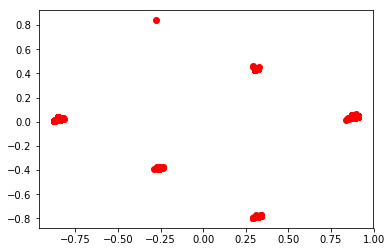

In [360]:
plt.plot(X[:,0],X[:,1], 'ro' )

In [331]:
sha1list = dfiuse['sha1']
cluster = [sha1list[kmff.labels_==0],sha1list[kmff.labels_ == 1],sha1list[kmff.labels_ ==2]]

In [332]:
cluster

[1        00036d496f906107c2943b2f38fa9a65888c0e5f
 11       00445f1d646250bb383b587e37b1ab76fb02a7cd
 13       004950b412188d2e53d2b3b5ae965faf6e9f45ee
 36       00acffc5820792e06dd67b46c93f48d1082d8e65
 39       00b6727ea254a757dc06112ba5ce9121b84d6b2e
 44       00ce2ff9017c270a6bca471f34ebcba12c9eab36
 57       01011bff8f6ff48ca7d1eb0722b50867f4f5d862
 70       011ba3eb1636e6908252e5b77219204dd5ed04e4
 80       01386b5f9a380e188cd4a1689ac129e5f4b3397d
 96       0160adc0eec602b903d159f42697b24e63ca3cbe
 114      0199884a1e7a94e82f62ed49d0f6e42d3b48194a
 121      01b4ec75efe59275a048a27a6aa3ce7085182a8c
 128      01d2df4608c70818bab8c1426d6475062f7d8dd7
 131      01e10cc67f5b1be872bc12757133addd275f8a66
 152      02287c4df3caacef57542e19b1b98efdf45d8b90
 172      026b64eae3af3ee86fa2dcd21436270b32e3f8cc
 175      0277cb70e9fb5c60e9f7ca7f2a4f8f3be832423d
 177      027dee1e4810273d38ae07ba1bc14dfecee5489d
 178      028a9d166a1332a1aa6cd9fd1b2bb5404f5469d9
 179      02923365c542ea58cc2e6

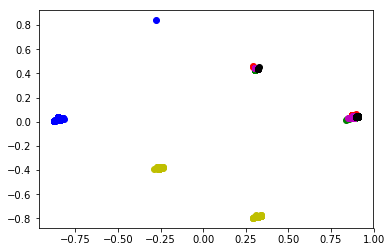

In [361]:
color = ['ro','bo','go','yo','mo','ko','wo']
for i in range(6):
    plt.plot(X[kmff.labels_==i][:,0],X[kmff.labels_==i][:,1],color[i])

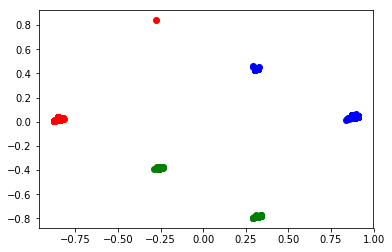

In [350]:
cluster1 = X[kmff.labels_==0]
x1 =  cluster1[:,0]
y1 = cluster1[:,1]
plt.plot(x1,y1,'ro')
cluster2 = X[kmff.labels_==1]
x2 = cluster2[:,0]
y2 = cluster2[:,1]
plt.plot(x2,y2,'bo')
cluster3 = X[kmff.labels_==2]
x3 = cluster3[:,0]
y3 = cluster3[:,1]
plt.plot(x3,y3,'go')
cluster4 = X[kmff.labels_==3]
x4 = cluster4[:,0]
y4 = cluster4[:,1]
plt.plot(x4,y4,'yo')

In [64]:
kmff.inertia_

616.1100680428035

In [61]:
x1

array([-0.68207145, -0.68210592, -0.68194543, ..., -0.68431847,
       -0.68382441, -0.68511121])

In [62]:
y1

array([ 0.01519337,  0.01861754,  0.01478213, ...,  0.02590765,
        0.03055711,  0.03041356])

In [63]:
len(cluster1)+len(cluster2)+len(cluster3)

17952

In [29]:
len(kmff.labels_)

17952

In [ ]:
COLORS=['r','g','b','pink','y']
finallist = ['SizeOfCodelog','FileSizelog','SizeOfImagenewlog','FileEntropy','SizeOfInitializedDatalog']
takeitem = df.loc[:,finallist[:k]].values
kmiter = KMeans(n_clusters = n).fit(takeitem)
if len(takeitem[0])>2:
        pca = decomposition.PCA(n_components=2)
        pca = pca.fit(takeitem)
        k = pca.transform(takeitem)
        for i in range(len(kmiter.labels_)): plt.scatter(X[:,0], X[:,1], c=COLORS[kmiter.labels_[i]])
    elif len(takeitem[0]) == 2:
        for i in range(len(kmiter.labels_)): plt.scatter(takeitem[i][0], takeitem[i][1], c=COLORS[kmiter.labels_[i]])
    
    else:
        pass
    

# Characteristics

In [278]:
df.Characteristics.value_counts()

0x102     8189
0x10f     5198
0x818e    1997
0x103      822
0x818f     604
0x210e     526
0x10e      312
0x122       71
0x838e      42
0x30f       33
0x123       32
0x12f       30
0x30e       25
0x32b       19
0x307        6
0x147        6
0x20f        6
0x303        5
0x107        4
0x106        4
0x838f       3
0x2102       2
0x210f       2
0x23         2
0xa18e       2
0x32f        1
0x8daf       1
0x922        1
0xd02        1
0x10a        1
0x127        1
0x2103       1
0xd03        1
0x11f        1
0x516        1
Name: Characteristics, dtype: int64

In [19]:
kmeanlist = []
featlist = ['FileSizelog','SizeOfImagenewlog','SizeOfInitializedDatalog','SizeOfCodelog','FileEntropy']
for i in range(1,6):
    
    for k in it.combinations(featlist,i):
        new_feats = df.loc[:,k].values
        for j in range(2,6):
            km = KMeans(n_clusters=j).fit(new_feats)
            kmeanlist.append((j,k,km.inertia_))

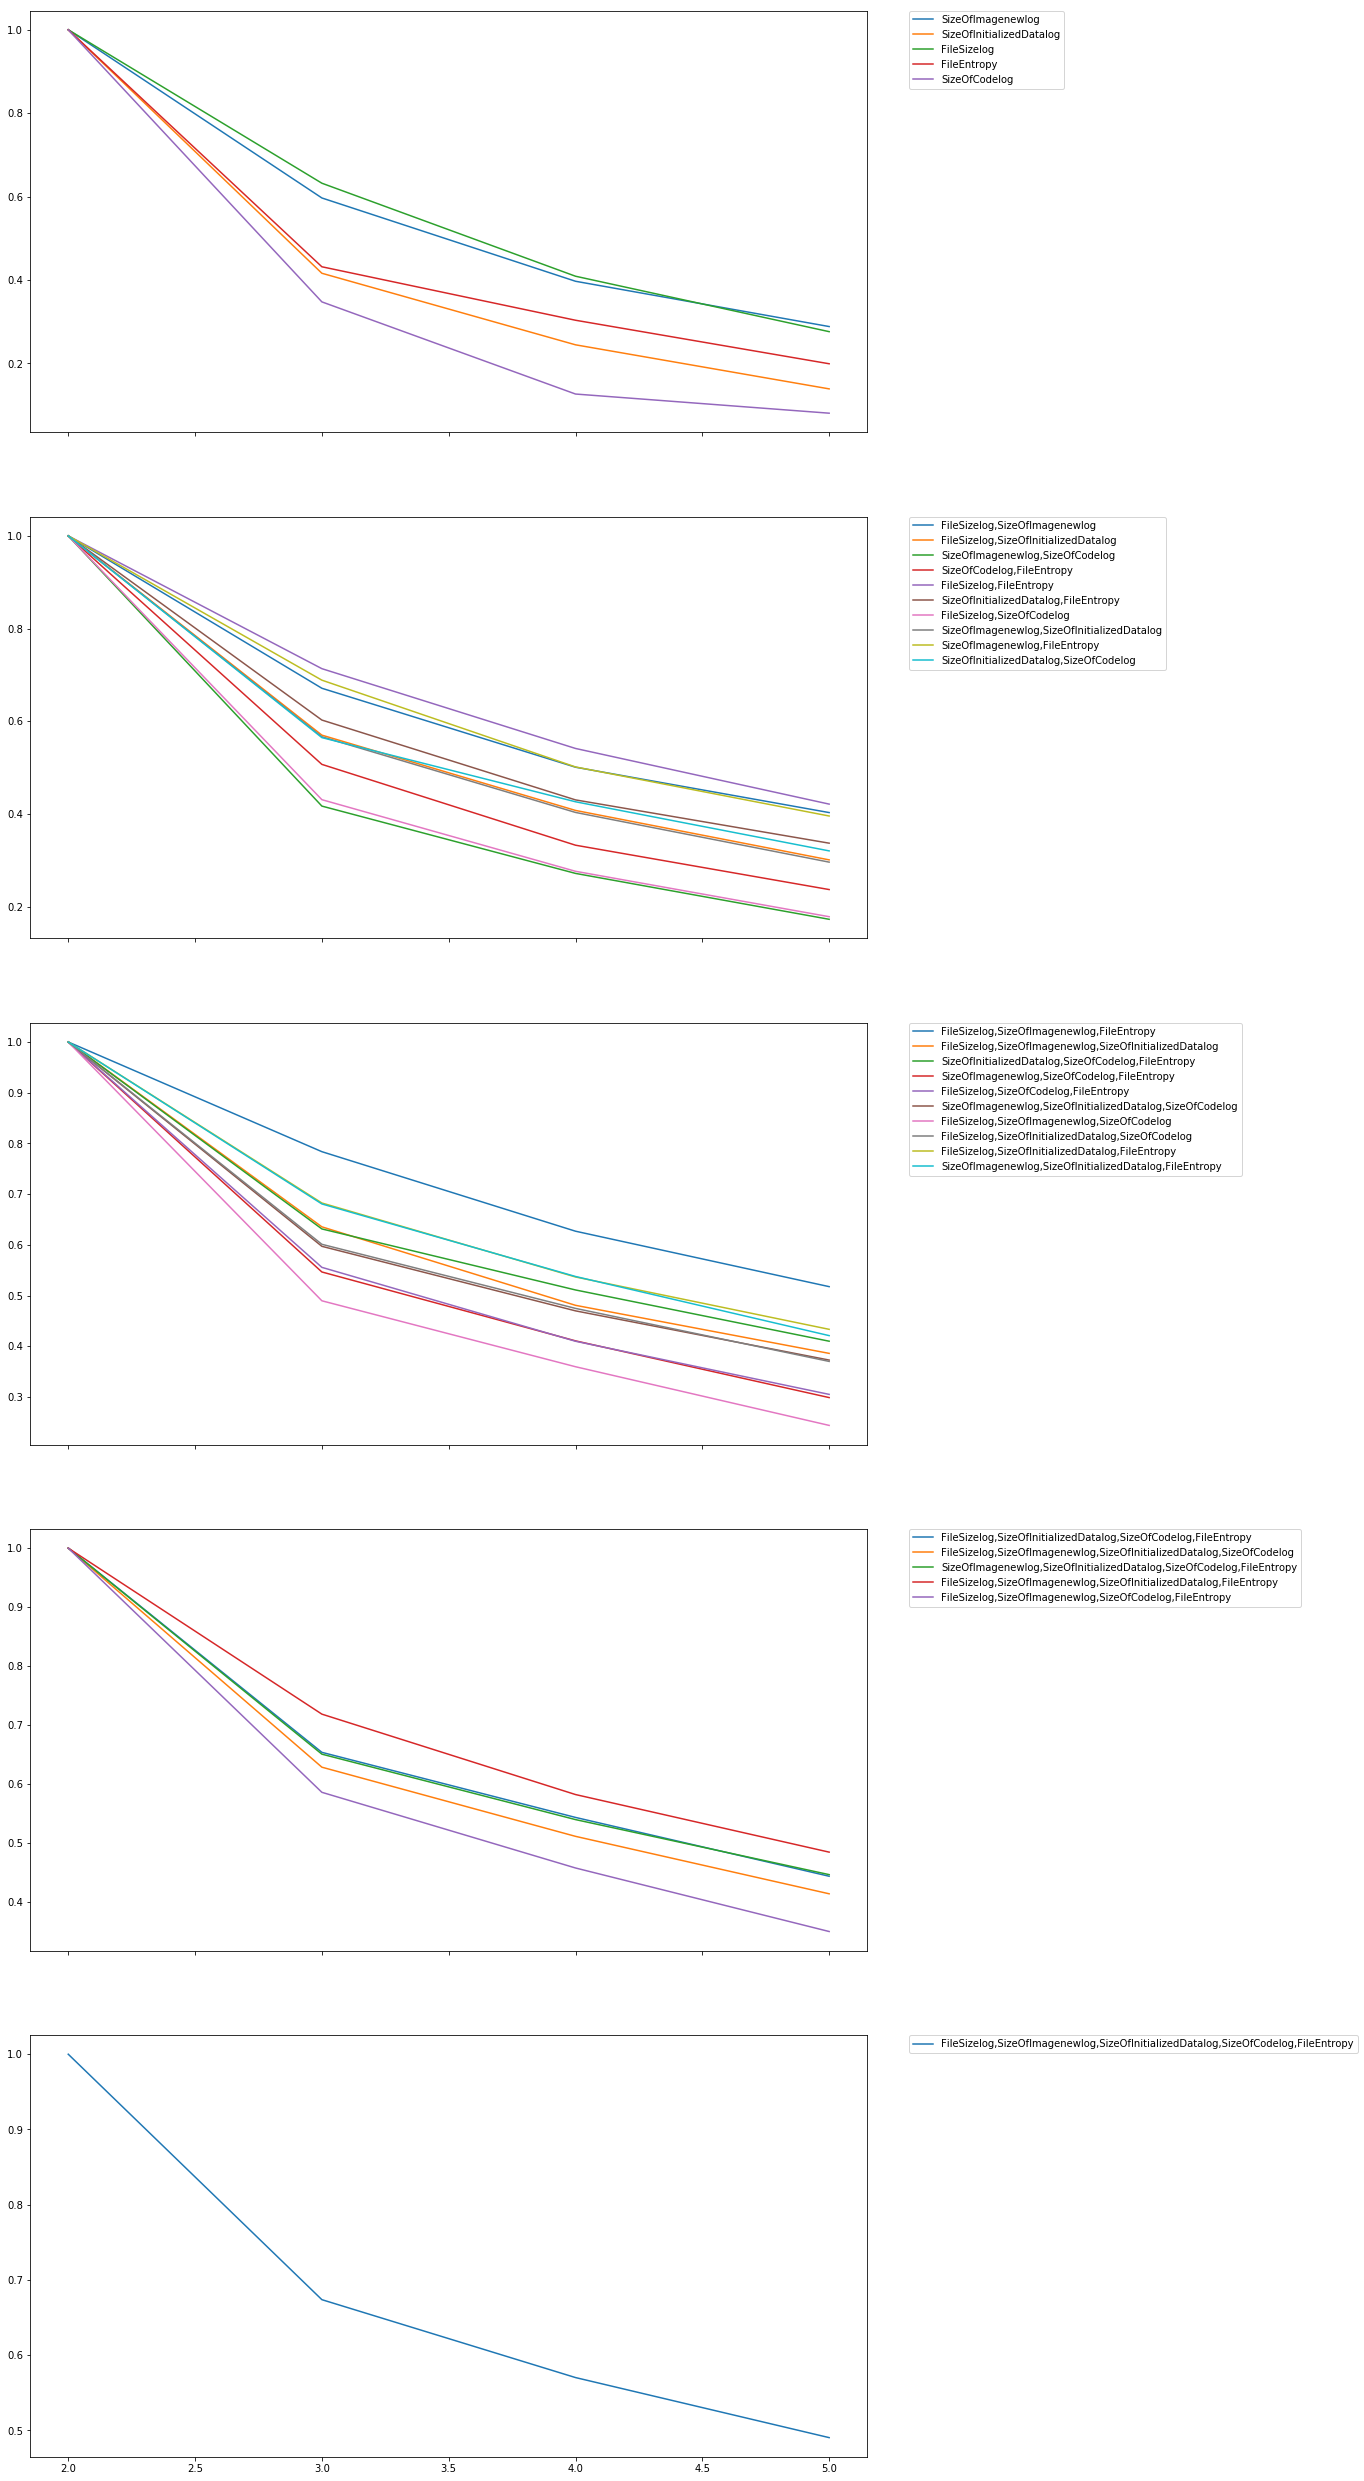

In [20]:
f, ax = plt.subplots(5, sharex=True,figsize=(15,45))

featlist = ['FileSizelog','SizeOfImagenewlog','SizeOfInitializedDatalog','SizeOfCodelog','FileEntropy']

for i in range(1,6):
    kmean_dict = {}
    for k in it.combinations(featlist,i):
        kmlist=[]
        new_feats = df.loc[:,k].values
        for j in range(2,6):
            km = KMeans(n_clusters=j).fit(new_feats)
            kmlist.append(km.inertia_)
        kmean_dict[k]=map(lambda x:x/kmlist[0], kmlist)
    for k in kmean_dict:
        klabel = ','.join(k)
        ax[i-1].plot([2,3,4,5],kmean_dict[k],label= klabel)
        ax[i-1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

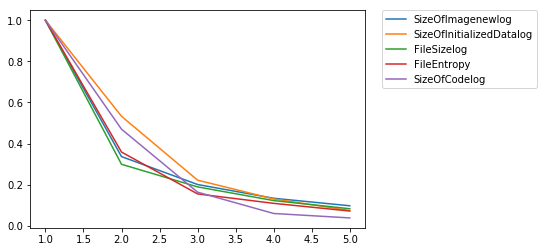

In [89]:
def plotkm(i):
    featlist = ['FileSizelog','SizeOfImagenewlog','SizeOfInitializedDatalog','SizeOfCodelog','FileEntropy']
    kmean_dict = {}
    for k in it.combinations(featlist,i):
        kmlist=[]
        new_feats = df.loc[:,k].values
        for j in range(1,6):
            km = KMeans(n_clusters=j).fit(new_feats)
            kmlist.append(km.inertia_)
        kmean_dict[k]=map(lambda x:x/kmlist[0], kmlist)
    for k in kmean_dict:
        klabel = ','.join(k)
        plt.plot([1,2,3,4,5],kmean_dict[k],label= klabel)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plotkm(1)

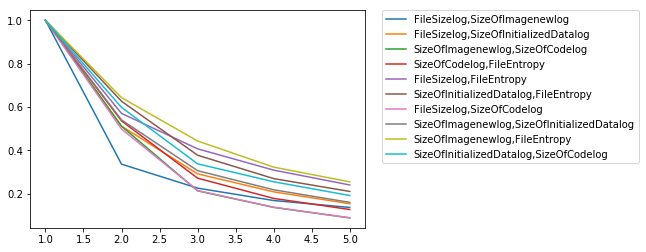

In [90]:
plotkm(2)

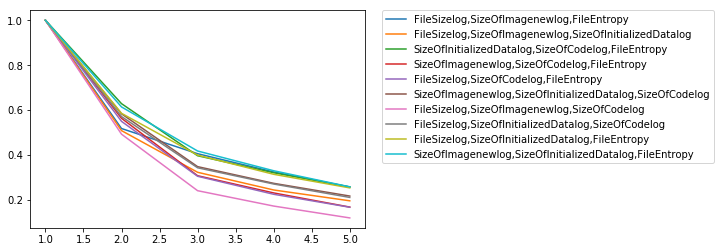

In [91]:
plotkm(3)

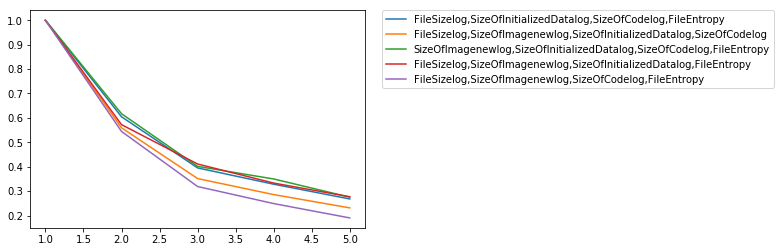

In [114]:
plotkm(4)

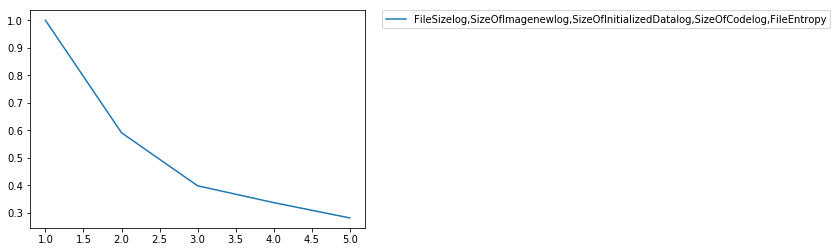

In [115]:
plotkm(5)

In [35]:
new_feats

array([[13.373540685173536, 13.43576144105494, 13.105259944004528,
        11.873121203630857, 7.68052371269871],
       [11.058621941528564, 11.95535875117838, 10.669164675100605,
        9.534233826390535, 7.876824723013971],
       [13.521775536656552, 13.521774195227245, 11.362300230119235,
        13.285843544764926, 6.231757935069372],
       ..., 
       [14.527572226443317, 14.538356822188002, 12.757474793691093,
        14.301388151523591, 6.682851118497127],
       [14.1445164190166, 14.167091650241243, 12.559096432098668,
        13.770413814710839, 6.678975570521632],
       [11.761666585132009, 11.901291886836486, 10.920473936490946,
        11.215071837196952, 6.20654436241036]], dtype=object)

# 行得通但過於複雜

In [38]:
# a = [0]*(2**5-1)
# len(a)

In [41]:
from sklearn.cluster import KMeans
onefeatbest = df.SizeOfCodelog.values
print len(onefeatbest)

17952


In [60]:
onefeatbest = onefeatbest.reshape(17952,1)
onefeatbest

array([[ 11.8731212 ],
       [  9.53423383],
       [ 13.28584354],
       ..., 
       [ 14.30138815],
       [ 13.77041381],
       [ 11.21507184]])

In [174]:
onefeatbest[1]

array([ 9.53423383])

# One feature Histrogram function

In [193]:
def histo(k,n):
    histolist = [[] for x in xrange(0,n)]
    KM = KMeans(n_clusters = n).fit(k)
    for i in range(len(KM.labels_)):        
#         print KM.labels_[i]
        histolist[KM.labels_[i]].append(k[i][0])
    facecolorlist = ['green','red','blue','yellow','pink']
    # the histogram of the data
    for i,color in zip(histolist,facecolorlist):
        print len(i)
        n, bins, patches = plt.hist(i, 50, normed=1, facecolor=color, alpha=0.75)

    # # add a 'best fit' line
    # y = mlab.normpdf( bins, sum(km1listforplt[0])/len(km1listforplt[0]), sigma)
    # l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.axis([5,16, 0, 5])
    plt.grid(True)

    plt.show()
    

4265
13687


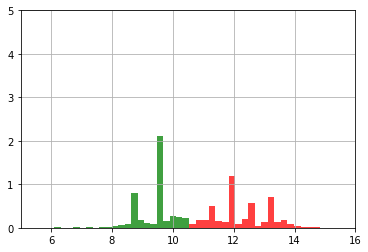

In [231]:
histo(onefeatbest,2)

# Histrogram

In [135]:
km1listforplt = [[],[]]
km1= KMeans(n_clusters=2).fit(onefeatbest)
for i in range(len(km1.labels_)): 
    km1listforplt[km1.labels_[i]].append(onefeatbest[i][0])
        

[[9.5342338263905351,
  10.298801309587917,
  9.5342338263905351,
  9.5342338263905351,
  9.5342338263905351,
  9.5342338263905351,
  9.5342338263905351,
  9.8218978154961736,
  9.9272529060863892,
  9.8492953234527008,
  9.5342338263905351,
  10.397238225511654,
  9.5342338263905351,
  0.0,
  8.8034242116007029,
  10.486847768485333,
  10.263711192398603,
  8.8034242116007029,
  9.9272529060863892,
  10.515017870423751,
  9.5342338263905351,
  8.8034242116007029,
  8.3180102775468718,
  9.5342338263905351,
  10.397238225511654,
  8.8775214538528715,
  9.5342338263905351,
  9.5342338263905351,
  9.704121561132915,
  9.5342338263905351,
  0.0,
  9.9019363500433908,
  9.5342338263905351,
  9.0110354101418153,
  9.5342338263905351,
  9.5342338263905351,
  8.8034242116007029,
  9.5342338263905351,
  0.0,
  8.8034242116007029,
  9.704121561132915,
  9.5342338263905351,
  8.9465050259986825,
  9.0110354101418153,
  9.4164598322845965,
  8.8034242116007029,
  9.0110354101418153,
  9.534233826

In [44]:
len(km1.labels_)

17952

In [45]:
a =[1,2,3]
sum(a)

6

In [186]:
len(x)
len(y)

13687

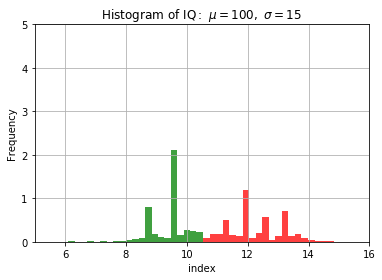

In [183]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = km1listforplt[0]

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
n, bins, patches = plt.hist(y, 50, normed=1, facecolor='red', alpha=0.75)

# # add a 'best fit' line
# y = mlab.normpdf( bins, sum(km1listforplt[0])/len(km1listforplt[0]), sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('index')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([5,16, 0, 5])
plt.grid(True)

plt.show()

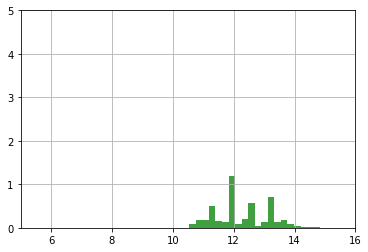

In [131]:
y = km1listforplt[1]

# the histogram of the data
n, bins, patches = plt.hist(y, 50, normed=1, facecolor='green', alpha=0.75)

# # add a 'best fit' line
# y = mlab.normpdf( bins, sum(km1listforplt[0])/len(km1listforplt[0]), sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)


plt.axis([5,16, 0, 5])
plt.grid(True)

plt.show()

In [96]:
twofeatbest = df.loc[:,['SizeOfCodelog','FileSizelog']].values

In [116]:
finallist = ['SizeOfCodelog','FileSizelog','SizeOfImagenewlog','FileEntropy','SizeOfInitializedDatalog']

In [119]:
df.loc[:,finallist[:2]].values

array([[ 11.8731212 ,  13.37354069],
       [  9.53423383,  11.05862194],
       [ 13.28584354,  13.52177554],
       ..., 
       [ 14.30138815,  14.52757223],
       [ 13.77041381,  14.14451642],
       [ 11.21507184,  11.76166659]])

# N clusters for first k terms

In [196]:
def scatter(k,n):
    COLORS=['r','g','b','pink','y']
    finallist = ['SizeOfCodelog','FileSizelog','SizeOfImagenewlog','FileEntropy','SizeOfInitializedDatalog']
    takeitem = df.loc[:,finallist[:k]].values
    kmiter = KMeans(n_clusters = n).fit(takeitem)
    if len(takeitem[0])>2:
        pca = decomposition.PCA(n_components=2)
        pca = pca.fit(takeitem)
        k = pca.transform(takeitem)
        for i in range(len(kmiter.labels_)): plt.scatter(X[:,0], X[:,1], c=COLORS[kmiter.labels_[i]])
    elif len(takeitem[0]) == 2:
        for i in range(len(kmiter.labels_)): plt.scatter(takeitem[i][0], takeitem[i][1], c=COLORS[kmiter.labels_[i]])
    
    else:
        pass
    

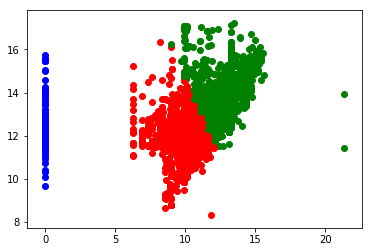

In [154]:
scatter(2,3)

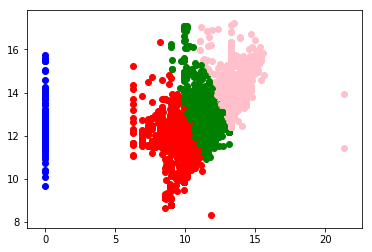

In [198]:
scatter(2,4) 